##Question # 1.2

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import math
X = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1] ]

In [ ]:
for i in range(len(X)):
  print("\n Distance between sample",i, X[i],"and [0,0,0]: ", math.dist(X[i], [0,0,0]))


 Distance between sample 0 [0, 3, 0] and [0,0,0]:  3.0

 Distance between sample 1 [2, 0, 0] and [0,0,0]:  2.0

 Distance between sample 2 [0, 1, 3] and [0,0,0]:  3.1622776601683795

 Distance between sample 3 [0, 1, 2] and [0,0,0]:  2.23606797749979

 Distance between sample 4 [-1, 0, 1] and [0,0,0]:  1.4142135623730951

 Distance between sample 5 [1, 1, 1] and [0,0,0]:  1.7320508075688772


In [ ]:
y=[0,0,0,1,1,0]
##0 for red and 1 for green
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y) 

predicted = knn.predict([[0,0,0]])
print("Predictions from the classifier:")
if(predicted ==0):
  print("red")
else:
  print("Green")


Predictions from the classifier:
Green


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X, y) 

predicted2 = knn2.predict([[0,0,0]])
if(predicted2==0):
  print("red")
else:
  print("Green")


red


##Question # 1.5

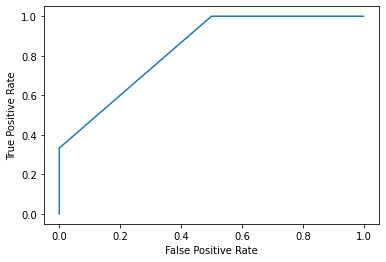

In [ ]:
from sklearn import metrics
from matplotlib import pyplot as plt
#prob= [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
#labels = [ 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
#fpr, tpr, _ = metrics.roc_curve(labels,  prob)
FPR = [0,0,0.25, 0.5, 1]
TPR = [0,0.333, 0.667, 1,1]
#create ROC curve
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Programming 

##Question # 2.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

df=pd.read_csv('D2z.txt', header=None, sep=' ', names= ["x1", "x2", "y"])
X=df.iloc[:,:-1]
y=df['y']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y) 
test1=np.linspace(-2,2, 40)
test2=np.linspace(-2,2, 40)
test = np.zeros((len(test1)**2,2))
for i,each in enumerate(test1):
  for j,each2 in enumerate(test2):
    test[(len(test1)*i)+j,:]= np.array((each,each2))


In [ ]:
test = pd.DataFrame({'x1':test[:,0], 'x2': test[:,1]})
predicted = knn.predict(test)
print("Predictions from the classifier:")
print(predicted)


Predictions from the classifier:
[1 1 1 ... 0 0 0]


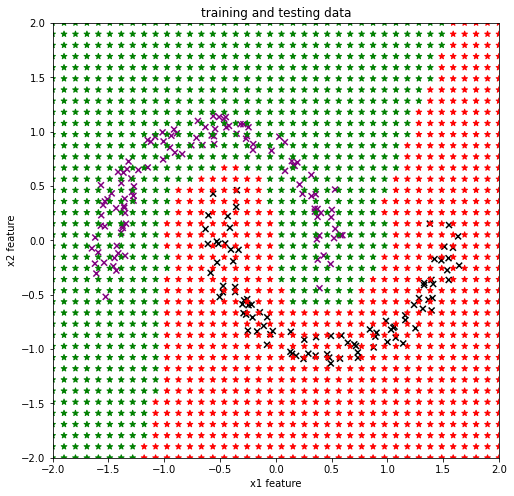

In [ ]:
colors1 = ['black', 'purple']
colors2 = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X['x1'], X['x2'], c=y, marker = 'x', cmap=matplotlib.colors.ListedColormap(colors1) )
plt.scatter(test['x1'], test['x2'], c=predicted, marker = '*', cmap=matplotlib.colors.ListedColormap(colors2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x1 feature')
plt.ylabel('x2 feature')
plt.title('training and testing data')
plt.show()


##Question # 2.2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score , accuracy_score
knn = KNeighborsClassifier(n_neighbors=1)
df= pd.read_csv('emails.csv')


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=False)
# enumerate splits
for i, indices in enumerate(kfold.split(df)):
  tr = indices[0]
  ts = indices[1]
  train=df.iloc[tr] 
  test=df.iloc[ts]
  X_train=train.iloc[:,1:-1]
  y_train=train['Prediction']
  X_test=test.iloc[:,1:-1]
  y_test=test['Prediction']
  knn.fit(X_train, y_train)
  y_predict=knn.predict(X_test)
  Acc = accuracy_score(y_test,y_predict)
  prec = precision_score(y_test,y_predict)
  recall = recall_score(y_test,y_predict)
  print("\nSplit # ",i+1)
  print("\n Accuracy: ", Acc, "Precision: ", prec, "Recall: ", recall)
  



 


Split #  1

 Accuracy:  0.825 Precision:  0.6544943820224719 Recall:  0.8175438596491228

Split #  2

 Accuracy:  0.853 Precision:  0.6857142857142857 Recall:  0.8664259927797834

Split #  3

 Accuracy:  0.862 Precision:  0.7212121212121212 Recall:  0.8380281690140845

Split #  4

 Accuracy:  0.851 Precision:  0.7164179104477612 Recall:  0.8163265306122449

Split #  5

 Accuracy:  0.775 Precision:  0.6057441253263708 Recall:  0.7581699346405228


##Question # 2.3

In [ ]:
import numpy as np 
import pandas as pd
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
import math

In [ ]:
df= pd.read_csv('emails.csv')
df = df.drop(['Email No.'], axis=1)
X= df.iloc[:,:-1]
y = df['Prediction']

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(X)
scaled_X = pd.DataFrame(d, columns=X.columns)

In [ ]:
scaled_X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.000000,0.000000,0.094072,0.000000,0.000000,0.000000,0.188144,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.023453,0.038111,0.070358,0.017590,0.017590,0.005863,0.299023,0.002932,0.079153,0.052769,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002932,0.0
2,0.000000,0.000000,0.049326,0.000000,0.000000,0.000000,0.394611,0.000000,0.000000,0.197305,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.030395,0.133737,0.000000,0.030395,0.006079,0.310026,0.012158,0.060789,0.006079,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.041197,0.035312,0.100050,0.005885,0.029427,0.011771,0.335462,0.000000,0.052968,0.017656,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.106112,0.031833,0.015917,0.005306,0.005306,0.005306,0.180390,0.000000,0.000000,0.079584,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005306,0.0
4996,0.000000,0.114554,0.016365,0.000000,0.000000,0.000000,0.327298,0.016365,0.016365,0.000000,...,0.0,0.0,0.0,0.0,0.016365,0.0,0.0,0.0,0.000000,0.0
4997,0.029223,0.038964,0.004871,0.014612,0.009741,0.004871,0.311713,0.034094,0.004871,0.077928,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4998,0.046752,0.035064,0.011688,0.029220,0.035064,0.005844,0.298042,0.023376,0.000000,0.023376,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
data=pd.concat([scaled_X,y],axis=1)
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0.000000,0.000000,0.094072,0.000000,0.000000,0.000000,0.188144,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
1,0.023453,0.038111,0.070358,0.017590,0.017590,0.005863,0.299023,0.002932,0.079153,0.052769,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002932,0.0,0
2,0.000000,0.000000,0.049326,0.000000,0.000000,0.000000,0.394611,0.000000,0.000000,0.197305,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
3,0.000000,0.030395,0.133737,0.000000,0.030395,0.006079,0.310026,0.012158,0.060789,0.006079,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
4,0.041197,0.035312,0.100050,0.005885,0.029427,0.011771,0.335462,0.000000,0.052968,0.017656,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005885,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.106112,0.031833,0.015917,0.005306,0.005306,0.005306,0.180390,0.000000,0.000000,0.079584,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005306,0.0,0
4996,0.000000,0.114554,0.016365,0.000000,0.000000,0.000000,0.327298,0.016365,0.016365,0.000000,...,0.0,0.0,0.0,0.016365,0.0,0.0,0.0,0.000000,0.0,0
4997,0.029223,0.038964,0.004871,0.014612,0.009741,0.004871,0.311713,0.034094,0.004871,0.077928,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
4998,0.046752,0.035064,0.011688,0.029220,0.035064,0.005844,0.298042,0.023376,0.000000,0.023376,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0


In [ ]:
def logistic(z):
  y = 1 / (1 + np.exp(-z))
  return y

def log_loss(y, y_dash):
  if(y_dash == 0):
    loss = - (y ) - ((1 - y) * np.log(1 - y_dash)) 
  elif(y_dash == 1):
    loss = - (y * np.log(y_dash)) - ((1 - y))
  else:  
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
  #print("loss",loss)
  return loss

def cost_func_vec(y, y_dash):
  m = len(y)
  loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
  cost = np.dot(loss_vec, np.ones(m)) / m
  #print("cost",cost)
  return cost

def cost_logreg_vec(X, y, w):
  m, n = X.shape
  z = np.matmul(X, w)
  y_dash = logistic(z)
  #print(z, y_dash)
  cost = cost_func_vec(y, y_dash)
  return cost

def grad_logreg_vec(X, y, w):     
  m, n = X.shape
  y_dash = logistic(np.matmul(X, w))
  grad_w = np.matmul(y_dash - y, X) / m
  #print(grad_w)
  return grad_w
  
def grad_desc(X, y, w, alpha, n_iter, show_cost = True, show_params = False):    
  m, n = X.shape
  cost_history, params_history = [], []
  for i, j in itertools.product(range(n_iter), range(1)):
    grad_w = grad_logreg_vec(X, y, w) 
    w += - alpha * grad_w
    cost =  cost_logreg_vec(X, y, w)
    cost_history.append(cost)
    params_history.append([w])
    if(show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1)):
      print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
    if(show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1)):
      print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
  return w, cost_history, params_history

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=False)
# enumerate splits
for i, indices in enumerate(kfold.split(data)):
  tr = indices[0]
  ts = indices[1]
  train=df.iloc[tr] 
  test=df.iloc[ts]
  X_train=train.iloc[:,1:-1]
  y_train=train['Prediction']
  X_test=test.iloc[:,1:-1]
  y_test=test['Prediction']
  w_out, cost_history, params_history = grad_desc(X_train.to_numpy(),
                                                       y_train.to_numpy(),
                                                       w = np.zeros(X_train.shape[1]),
                                                       alpha = 0.0003,
                                                       n_iter = 500)
  y_pred_prob=logistic(np.matmul(X_test, w_out))
  y_pred_prob = y_pred_prob.to_numpy()
  y_pred = np.zeros(y_pred_prob.shape)
  for j in range(len(y_pred_prob)):
    if (y_pred_prob[j]>=0.5):
      y_pred[j] = 1
    else:
      y_pred[j] = 0
  Acc = accuracy_score(y_test,y_pred)
  prec = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  print("\nSplit # ",i+1)
  print("\n Accuracy: ", Acc, "Precision: ", prec, "Recall: ", recall)
  



Iteration      0:    Cost  0.8127
Iteration     50:    Cost  0.6915
Iteration    100:    Cost  0.5865
Iteration    150:    Cost  0.4550
Iteration    200:    Cost  0.4379
Iteration    250:    Cost  0.4261
Iteration    300:    Cost  0.4160
Iteration    350:    Cost  0.4071
Iteration    400:    Cost  0.3993
Iteration    450:    Cost  0.3922
Iteration    499:    Cost  0.3859

Split #  1

 Accuracy:  0.888 Precision:  0.8619246861924686 Recall:  0.7228070175438597
Iteration      0:    Cost  0.8253
Iteration     50:    Cost  0.7160
Iteration    100:    Cost  0.6334
Iteration    150:    Cost  0.4534
Iteration    200:    Cost  0.4364
Iteration    250:    Cost  0.4236
Iteration    300:    Cost  0.4129
Iteration    350:    Cost  0.4037
Iteration    400:    Cost  0.3985
Iteration    450:    Cost  0.3926
Iteration    499:    Cost  0.3846

Split #  2

 Accuracy:  0.863 Precision:  0.8333333333333334 Recall:  0.631768953068592
Iteration      0:    Cost  0.8505
Iteration     50:    Cost  0.7346
Itera

#Programming - 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score , accuracy_score

df= pd.read_csv('emails.csv')



Average Accuracy for k =  1 :  0.8332

Average Accuracy for k =  3 :  0.8422000000000001

Average Accuracy for k =  5 :  0.8408

Average Accuracy for k =  7 :  0.8462

Average Accuracy for k =  10 :  0.8556000000000001


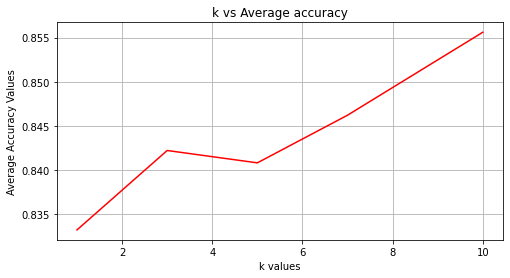

In [ ]:
from sklearn.model_selection import KFold
k_values = [1, 3, 5, 7, 10]
avg_acc = []
kfold = KFold(n_splits=5, shuffle=False)
# enumerate splits
for each in k_values:
  acc = 0
  for i, indices in enumerate(kfold.split(df)):
    tr = indices[0]
    ts = indices[1]
    train=df.iloc[tr] 
    test=df.iloc[ts]
    X_train=train.iloc[:,1:-1]
    y_train=train['Prediction']
    X_test=test.iloc[:,1:-1]
    y_test=test['Prediction']
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(X_train, y_train)
    y_predict=knn.predict(X_test)
    Acc = accuracy_score(y_test,y_predict)
    acc = acc + Acc
  avg_acc.append(acc/5)
  print("\nAverage Accuracy for k = ",each,": ", acc/5)

plt.figure(figsize=(8,4))
plt.plot(k_values, avg_acc, color = 'red')
plt.grid()
plt.xlabel("k values")
plt.ylabel("Average Accuracy Values")
plt.title("k vs Average accuracy")
plt.show()


  



 

#Programming - 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , accuracy_score

df= pd.read_csv('emails.csv')
X_train, X_test, y_train,  y_test = train_test_split(df.iloc[:,1:-1], df['Prediction'], shuffle=True, stratify= df['Prediction'])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
w_out, cost_history, params_history = grad_desc(X_train.to_numpy(),
                                                       y_train.to_numpy(),
                                                       w = np.zeros(X_train.shape[1]),
                                                       alpha = 0.0003,
                                                       n_iter = 500)

Iteration      0:    Cost  0.8162
Iteration     50:    Cost  0.6946
Iteration    100:    Cost  0.5752
Iteration    150:    Cost  0.4541
Iteration    200:    Cost  0.4319
Iteration    250:    Cost  0.4197
Iteration    300:    Cost  0.4096
Iteration    350:    Cost  0.4008
Iteration    400:    Cost  0.3931
Iteration    450:    Cost  0.3863
Iteration    499:    Cost  0.3801


In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_prob_lr=logistic(np.matmul(X_test, w_out))
y_pred_prob_lr = y_pred_prob_lr.to_numpy()
y_pred_lr=np.zeros(len(y_pred_prob_lr))
for j in range(len(y_pred_prob_lr)):
  if (y_pred_prob_lr[j]>=0.5):
    y_pred_lr[j] = 1
  else:
    y_pred_lr[j] = 0

y_pred_knn=knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)

In [ ]:
print("Accuracy for kNN (k=5): ",accuracy_score(y_test, y_pred_knn))
print("Accuracy for Logistic Regression: ",accuracy_score(y_test, y_pred_lr))

Accuracy for kNN (k=5):  0.8688
Accuracy for Logistic Regression:  0.864


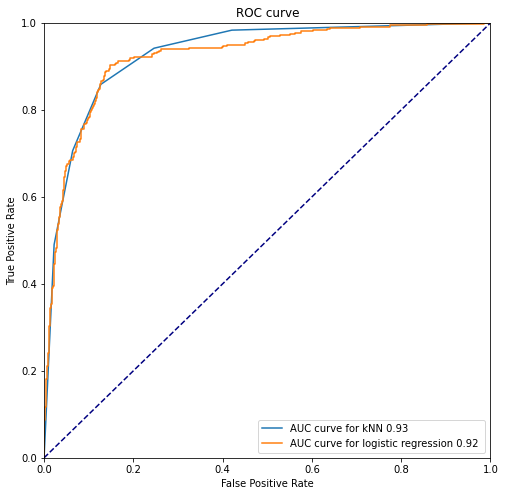

In [90]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob_knn[:,1])
auc_roc1 = auc(fpr1,tpr1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob_lr)
auc_roc2 = auc(fpr2,tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='AUC curve for kNN %0.2f' % auc_roc1)
plt.plot(fpr2, tpr2, label='AUC curve for logistic regression %0.2f ' % auc_roc2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()